<a href="https://colab.research.google.com/github/ProfAI/matplotlib-crash/blob/main/matplotlib_crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafici e Visualizzazioni con Matplotlib: Crash Course
Matplotlib è una libreria Python che permette di creare grafici e visualizzazioni in maniera estremamente semplice e si integra perfettamente con Numpy.<br><br>
In questo notebook vedremo le funzioni basilari di questa potente libreria.<br><br>
Per prima cosa importiamo tutto il modulo pyplot da matplotlib con l'alias plt. Importiamo anche numpy, ci servirà per generare i dati per i nostri grafici.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Per visualizzare i grafici direttamente all'interno del notebook dobbiamo eseguire il seguente comando subito aver importato la libreria.

In [ ]:
%matplotlib inline

La dimensione dei grafici di matplotlib è abbastanza piccola, rendiamole leggermente più grandi.

In [ ]:
#plt.figure(figsize=(14,10)) # questa istruzione non funziona in un notebook (almeno a me :) 
plt.rcParams['figure.figsize'] = [14, 10] # istruzione equivalente a quella sopra, ma funzionante dentro al notebook

## Creiamo un dataset

In [ ]:
mq = np.random.randint(100, size=(50, 1))+20 # generiamo 50 valori casuali compresi tra 20 e 120
price = np.power(mq,2)*10 # generiamo i valori del prezzo come il quadrato dei metri quadri moltiplicato per 10
print(price.shape)
noise = np.random.rand(50, 1)*25000 # creiamo un po' di rumore...
price = (price+noise) # ...e aggiungiamolo al prezzo

(50, 1)


In [ ]:
mq_price = np.concatenate([mq, price], axis=1)
mq_price.shape

(50, 2)

In [ ]:
np.savetxt("prezzo_monolocali.csv", mq_price, delimiter=",")

In [ ]:
mq_center = np.random.randint(100,size=(10,1))
price_center = np.power(mq_center,2)*1.5
noise = np.random.rand(10,1)*2500
price_center = (price_center+noise)*10

mq_price = np.concatenate([mq_center, price_center], axis=1)

np.savetxt("prezzo_monolocali_centro.csv", mq_price, delimiter=",")

## Scatter plot
Il primo tipo di grafico che vediamo è lo **Scatter Plot** (conosciuto in italiano come **grafico di dispersione**).<br>
Uno scatter plot rappresenta coppie di valori come semplici punti su di un grafico cartesiano.<br><br>
Creiamo un grafico per mostrare la relazione tra dimensione e valore di un monolocale. Matplotlib può lavorare sia su dataframe Pandas.

In [ ]:
df = pd.read_csv("prezzo_monolocali.csv", names=["dimensione","valore"]) 
df.head()

,dimensione,valore
0,40.0,21303.539000
1,104.0,108341.116954
2,104.0,123415.237586
3,95.0,106374.355604
4,102.0,116172.266130


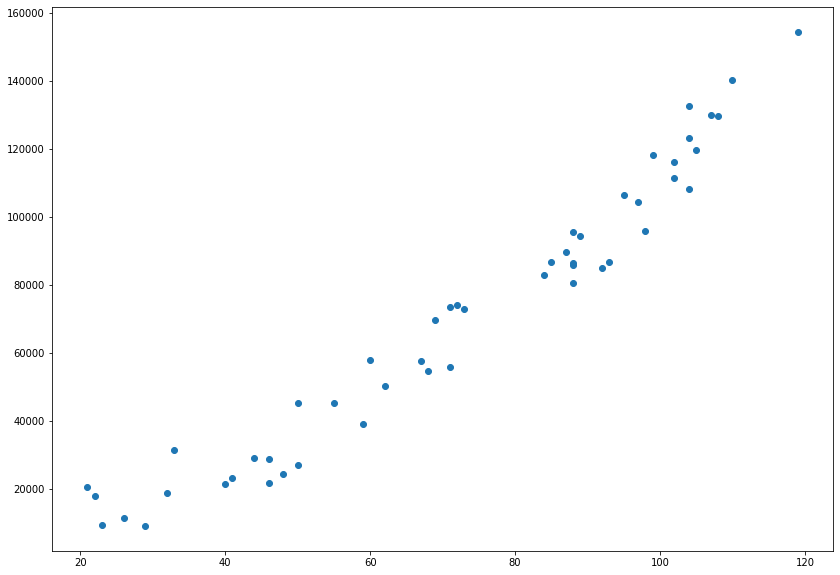

In [ ]:
plt.scatter(df["dimensione"], df["valore"])
plt.show()

Che su array numpy

In [ ]:
mq = df["dimensione"].values
price = df["valore"].values

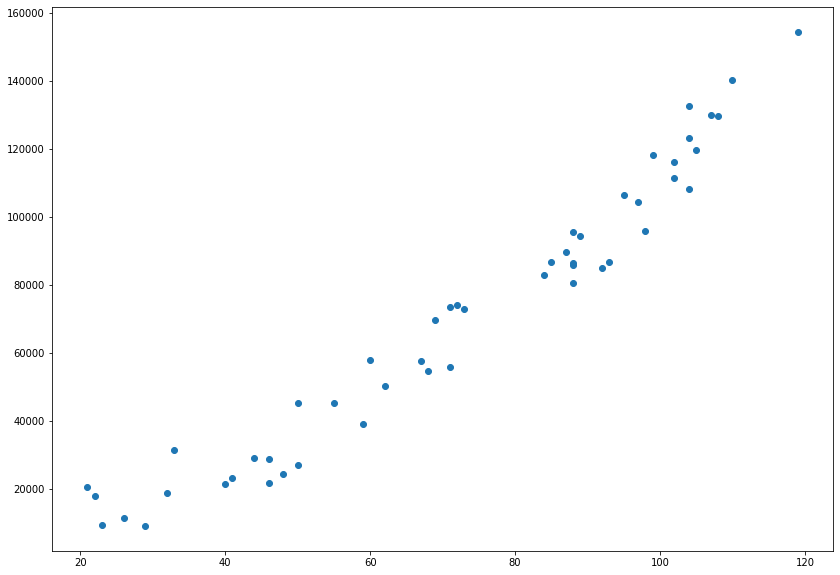

In [ ]:
plt.scatter(mq, price)
plt.show()

Da ora in avanti utilizzeremo gli array numpy, ma le stesse tecniche e metodi che vedremo possono essere utilizzate anche su dataframe pandas.

Il grafico è un po' povero, aggiungiamo un titolo, dei labels per le assi e una griglia.

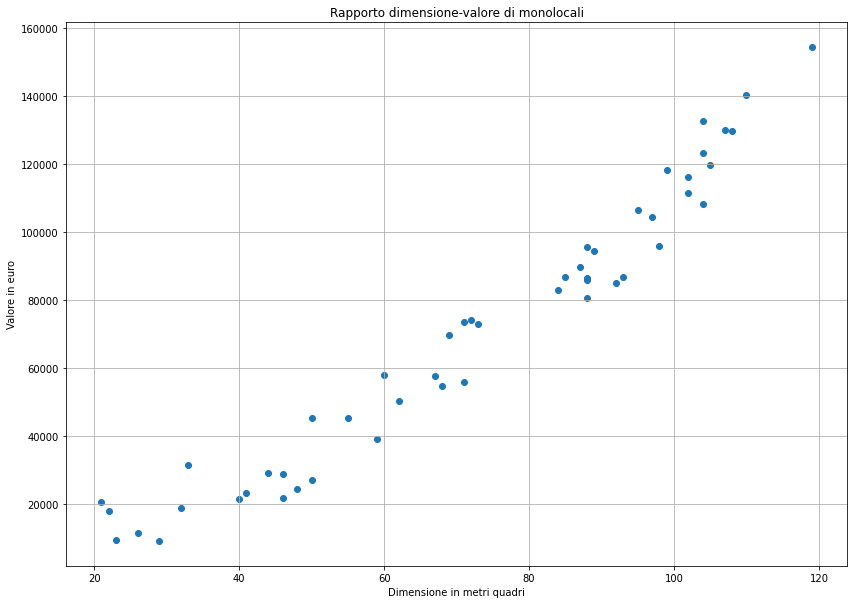

In [ ]:
plt.title("Rapporto dimensione-valore di monolocali")
plt.xlabel("Dimensione in metri quadri")
plt.ylabel("Valore in euro")
plt.grid()

plt.scatter(mq,price)
plt.show()

Ora mettiamo caso di avere informazioni su altri monolocali, che però si trovano in una zona più centrale.<br>

In [ ]:
df_center = pd.read_csv("prezzo_monolocali_centro.csv", names=["dimensione","valore"]) 
df_center.head()

,dimensione,valore
0,87.0,131219.316130
1,98.0,161368.727847
2,30.0,27074.245937
3,14.0,10165.797571
4,49.0,49542.119464


In [ ]:
mq_center = df_center["dimensione"].values
price_center = df_center["valore"].values

All'interno del grafico vogliamo mostrare questa informazione, possiamo farlo creando pallini di dimensione e colore diverso per i monolocali del centro.

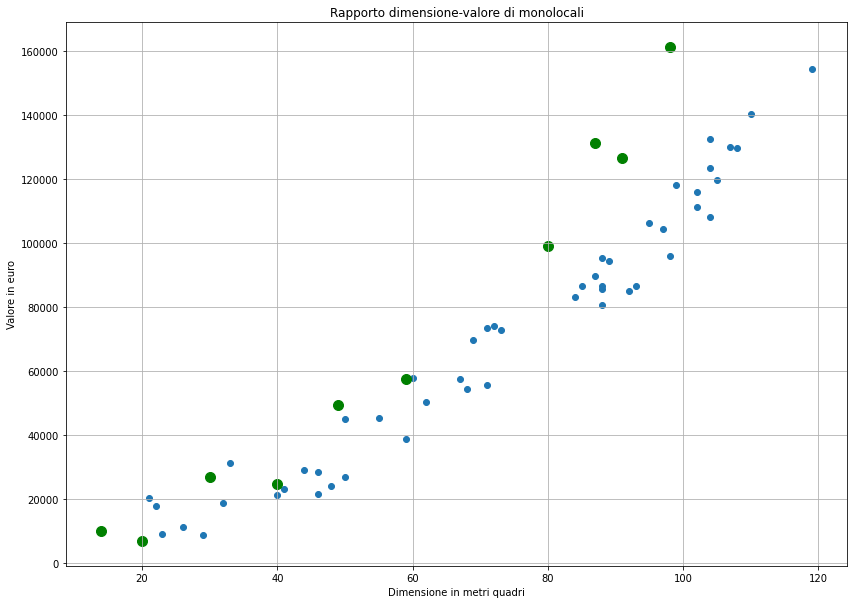

In [ ]:
plt.title("Rapporto dimensione-valore di monolocali")
plt.xlabel("Dimensione in metri quadri")
plt.ylabel("Valore in euro")
plt.grid()

plt.scatter(mq, price)
plt.scatter(mq_center, price_center, s=100., c="green")
plt.show()

**NOTA BENE** quando inseriamo diversi scatter plot all'interno di un grafico, come fatto sopra, i loro marker vengono automaticamente colorati con colori diversi, quindi il parametro <span style="font-family: Monaco">c="green"</span> poteva essere omesso.
<br><br>
Aggiungiamo una legenda al grafico utilizzando la funzione <span style="font-family: Monaco">legend</span>, per utilizzare questa funzione dobbiamo specificare un label ad ogni scatter plot.
<br>
Tramite il parametro marker possiamo anche cambiare la tipologia di marker, ne esistono diversi, questi sono i principali:
 * <span style="font-family: Monaco">'o'</span>: pallino classico
 * <span style="font-family: Monaco">'x'</span>: croce
 * <span style="font-family: Monaco">'s'</span>: quadrato
 * <span style="font-family: Monaco">'^'</span>: triangolo
 * <span style="font-family: Monaco">'*'</span>: stella


[Qui](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers) trovi una lista completa dei markers utilizzabili.<br><br>
Matplotlib permette di esportare semplicemente i grafici utilizzando il metodo <span style="font-family: Monaco">savefig</span>, facciamolo.

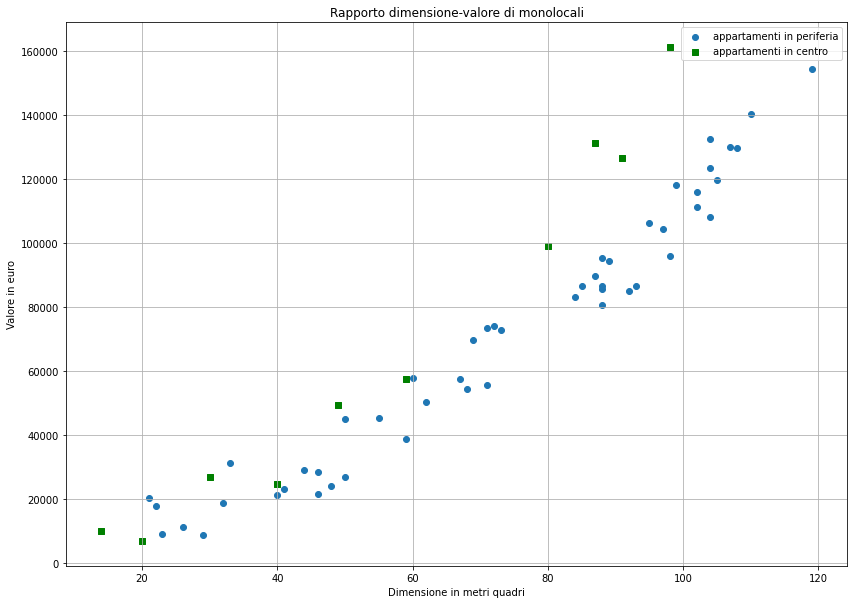

In [ ]:
plt.title("Rapporto dimensione-valore di monolocali")
plt.xlabel("Dimensione in metri quadri")
plt.ylabel("Valore in euro")
plt.grid()

plt.scatter(mq, price, label="appartamenti in periferia") # aggiungiamo un label per i monolocali in centro
plt.scatter(mq_center, price_center, marker="s",  c="green", label="appartamenti in centro") # aggiungiamo un label per i monolocali in centro

plt.legend() # mostriamo la legenda

plt.savefig("scatter.png") # esportiamo il grafico in un file chiamato 'scatter.png' all'interno della cartella 'res'

## Line Chart
Un **Line Chart** è un tipo di grafico simile ad uno scatter plot, in cui però i punti vengono uniti da una retta.
<br><br>
Quotiamo [ProfessionAI](https://profession.ai) in borsa, abbiamo un dataset contenente il prezzo di chiusura dei primi 100 giorni del titolo.

In [ ]:
np.random.seed(1)
days = 100
stock_price = df = pd.DataFrame(np.random.randn(days, 1), columns=["ProfessionAI"])+0.2
stock_price = df.cumsum()+80

Mostriamolo all'interno di un line chart, per farlo possiamo semplicemente passare i dati alla funzione <span style="font-family: Monaco">plot</span>.

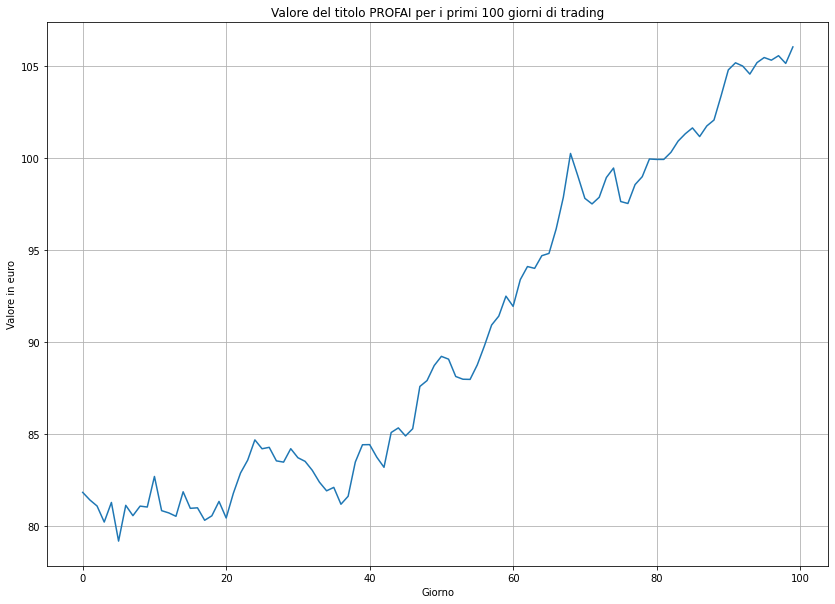

In [ ]:
plt.title("Valore del titolo PROFAI per i primi 100 giorni di trading")
plt.xlabel("Giorno")
plt.ylabel("Valore in euro")
plt.grid()
plt.plot(stock_price)
plt.show()

**NOTA BENE** Passando un unico parametro alla funzione <span style="font-family: Monaco">plot</span> questa lo utilizzerà per le assi delle y, mentre per l'asse delle x utilizzerà l'indice, che di default è l'indice di posizione dell'osservazione. Tramite il metodo set_index possiamo modificare l'indice, ad esempio utilizzando una serie di date generate con il metodo date_range.
<br><br>


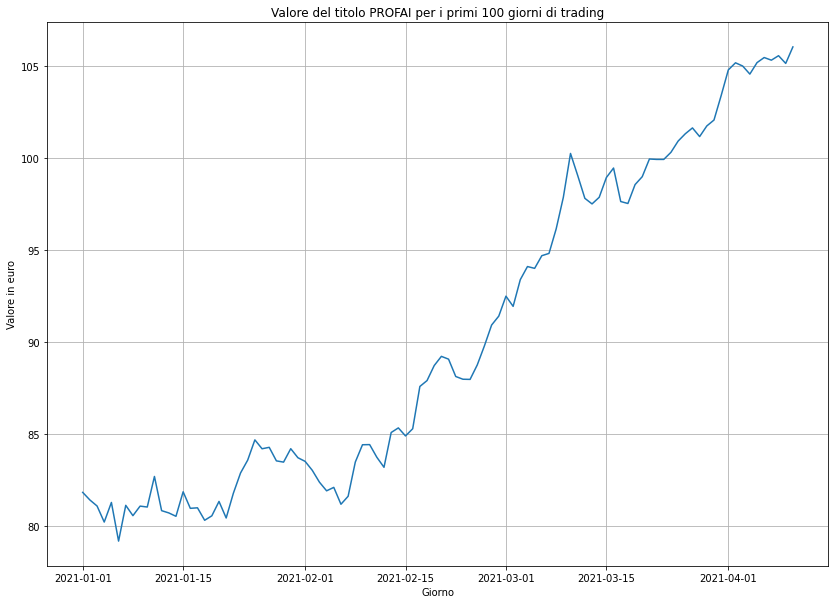

In [ ]:
stock_price_with_date = stock_price.set_index(pd.date_range("1/1/2021", periods=days))

plt.title("Valore del titolo PROFAI per i primi 100 giorni di trading")
plt.xlabel("Giorno")
plt.ylabel("Valore in euro")
plt.grid()
plt.plot(stock_price_with_date)
plt.show()

Come puoi vedere adesso sull'asse delle x abbiamo il nuovo indice, cioè le date.

Utilizzando la funzione <span style="font-family: Monaco">xlim</span> possiamo limitare il grafico ad un range di valori, questo ci permette di "zoomare" su di una certa parte del grafico.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


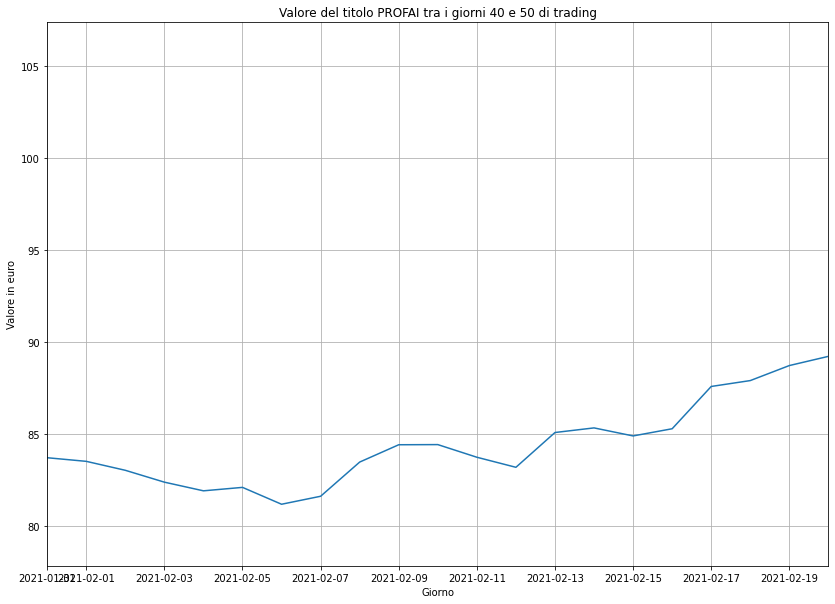

In [ ]:
plt.title("Valore del titolo PROFAI tra i giorni 40 e 50 di trading")
plt.xlabel("Giorno")
plt.ylabel("Valore in euro")
plt.grid()

#plt.xlim(xmin=40, xmax=50) # xin caso si volesse utilizzare solo un limite inferiore o superiore
#plt.xlim(40,50)
plt.xlim(pd.datetime(2021,1,31),pd.datetime(2021,2, 20))

plt.plot(stock_price_with_date)
plt.show()

Possiamo aggiungere annotazioni all'interno di un grafico utilizzando la funzione <span style="font-family: Monaco">annotate</span>, possiamo anche aggiungere solo testo in qualunque punto del grafico utilizzando la funzione <span style="font-family: Monaco">text</span>

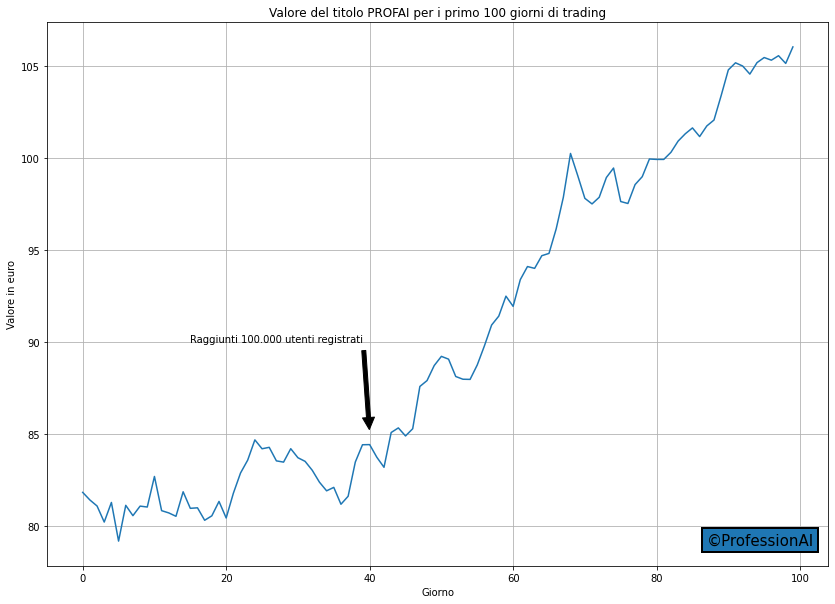

In [ ]:
plt.title("Valore del titolo PROFAI per i primo 100 giorni di trading")
plt.xlabel("Giorno")
plt.ylabel("Valore in euro")
plt.grid()

plt.annotate('Raggiunti 100.000 utenti registrati', #label dell'annotazione
             xy=(40, 85), #punto da annotare
             xytext=(15, 90), #punto dove inserire il testo dell'annotazione
             arrowprops=dict(facecolor='black', shrink=0.05),) #proprietà della freccia

plt.text(87, 79, "©ProfessionAI",size=15, # parametri del testo
            bbox=dict(boxstyle="square,pad=0.3", lw=2)) #parametri del box

plt.plot(stock_price)
plt.show()

E' possibile mostrare diversi tipi di grafici insieme, come un **line chart** e uno **scatter plot**, creandoli entrambi e poi chiamando la funzione <span style="font-family: Monaco">show</span>

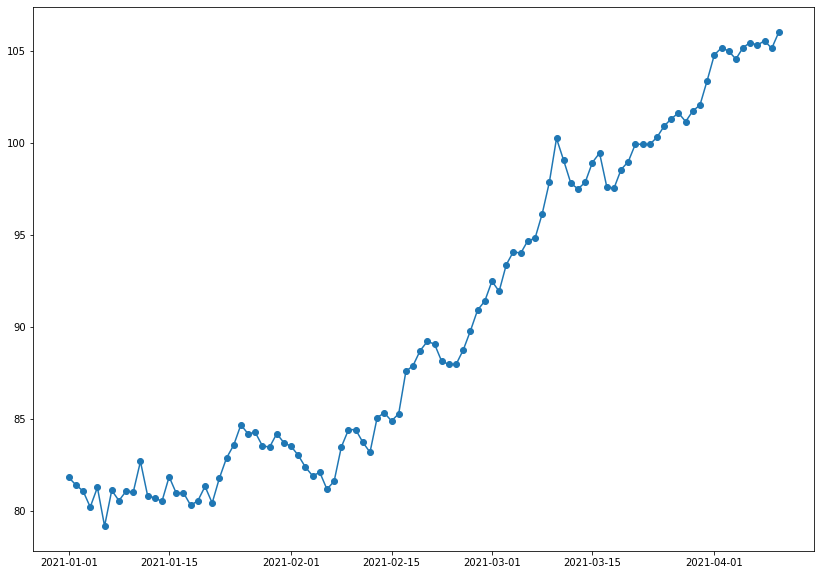

In [ ]:
plt.plot(stock_price_with_date)
plt.scatter(stock_price_with_date.index, stock_price_with_date["ProfessionAI"])
#plt.plot(x,y,'o') #avremmo potuto creare lo scatter plot anche in questo modo
plt.show()

## Bar Chart
L'ultimo tipo di grafico che vediamo è il **Bar Chart**, o grafico a barre in italiano.<br>
Questo tipo di grafico permette di fare dei confronti quantitativi di dati categorici utilizzando l'altezza dei rettangoli.
<br><br>
Creiamo un bar chart per confrontare i salari di diversi professionisti del digitale, utilizzando la funzione <span style="font-family: Monaco">bar</span> di Matplotlib.
La funzione <span style="font-family: Monaco">bar</span> crea un rettangolo per ogni dato e per farlo necessità di queste informazioni:
* Indice del rettangolo, per sapere come ordinare il grafico
* Valore dell'altezza

per poter creare una legenda passiamo anche un label.

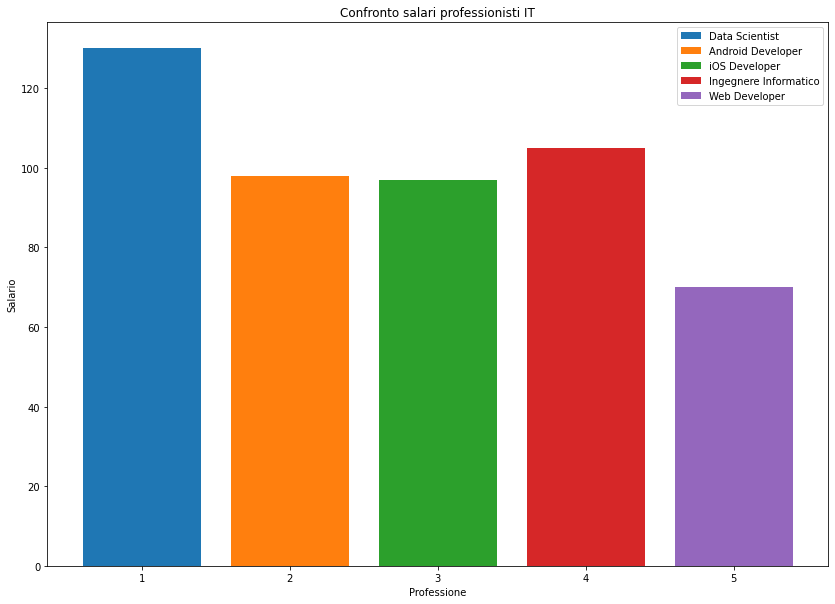

In [ ]:
plt.bar(1, 130, label="Data Scientist")
plt.bar(2, 98, label="Android Developer")
plt.bar(3, 97, label="iOS Developer")
plt.bar(4, 105, label="Ingegnere Informatico")
plt.bar(5, 70 ,label="Web Developer")

plt.title("Confronto salari professionisti IT")
plt.xlabel("Professione")
plt.ylabel("Salario")
plt.legend(loc="upper right")

plt.show()

Avremmo anche potuto chiamare la funzione <span style="font-family: Monaco">bar</span> una sola volta passandogli delle liste con le informazioni, in questo caso i rettangoli non verranno colorati automaticamente, ma possiamo sempre farlo manualmente con il parametro <span style="font-family: Monaco">color</span>.
<br>
Questa volta piuttosto che utilizzare una legenda inseriamo i label sull'asse utilizzando la funzione <span style="font-family: Monaco">xticks</span>

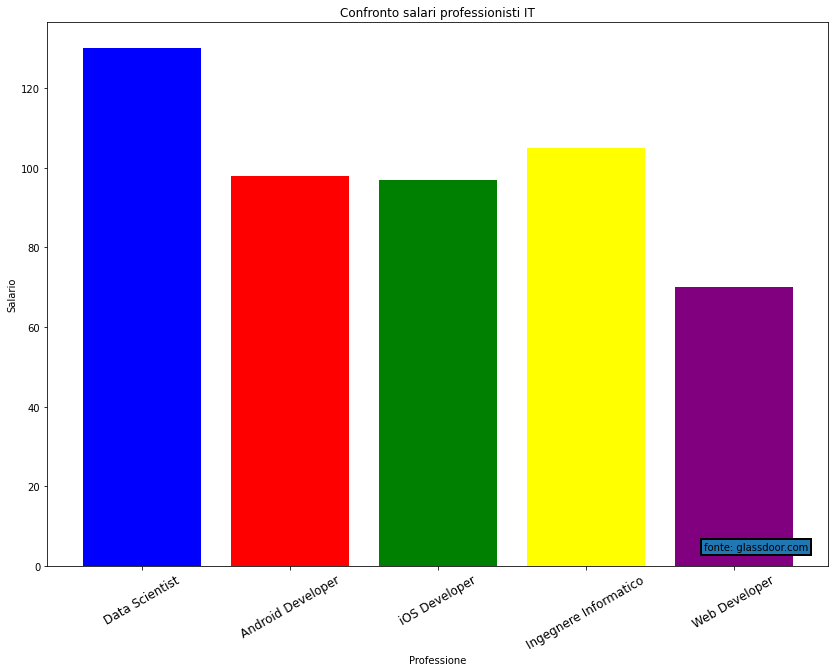

In [ ]:
labels = ["Data Scientist","Android Developer","iOS Developer",
         "Ingegnere Informatico","Web Developer"]

salary = [130, 98, 97, 105, 70]
colors = ["blue","red","green","yellow","purple"]
index = np.arange(len(labels))

plt.bar(index,salary,color=colors)
plt.xticks(index, labels, fontsize=12, rotation=30)

plt.title("Confronto salari professionisti IT")
plt.xlabel("Professione")
plt.ylabel("Salario")

plt.text(3.8, 4, "fonte: glassdoor.com",size=10, # parametri del testo
            bbox=dict(boxstyle="square,pad=0.3", lw=2)) #parametri del box

plt.show()

**NOTA BENE** come colori abbiamo passato dei nomi ma è anche possibile passare i valori esadecimali, sempre come stringhe (ES "ffffff" per il bianco).

## Grafici multi-assi

E' anche possibile visualizzare più grafici su di assi diverse all'interno di una stessa figura.<br>
Per farlo dobbiamo chiamare la funzione <span style="font-family: Monaco">axes</span> passandogli una lista o tupla con i seguenti parametri (in questo ordine):
 * punto X di origine degli assi
 * punto Y di origine degli assi
 * larghezza del grafico
 * altezza del grafico
 
Le misure sono espresse in'unità, quindi il valore 1 rappresenta altezza e larghezza massima della figura.<br>

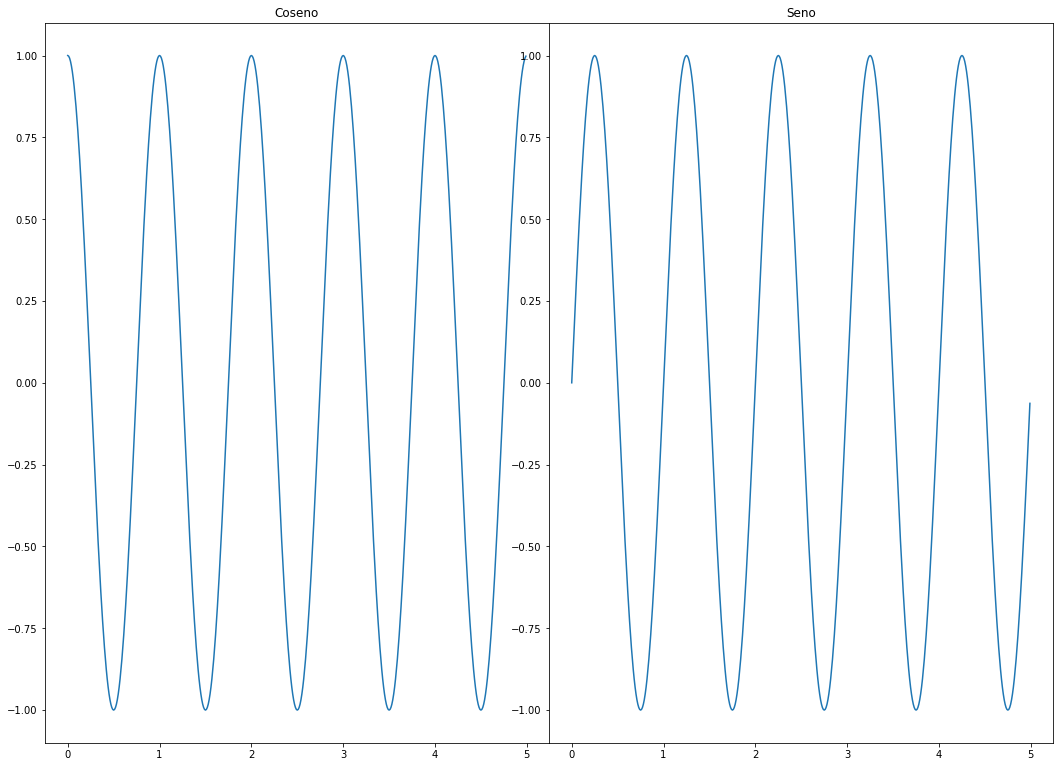

In [ ]:
x = np.arange(0.0, 5.0, 0.01) 

plt.axes([0.,1.,0.5,1.]) # creiamo gli assi per il grafico del coseno (sinistra)
cos_x = np.cos(2*np.pi*x)
plt.title("Coseno")
plt.plot(x,cos_x) # mostriamo il grafico negli assi definiti sopra

plt.axes([0.5,1,0.5,1.]) # creiamo gli assi per il grafico del seno (destra)
sin_x = np.sin(2*np.pi*x)
plt.title("Seno")
plt.plot(x,sin_x) # mostriamo il grafico negli assi definiti sopra

plt.show()

Un'altro metodo per ottenere questo risultato è utilizzare la funzione <span style="font-family: Monaco">subplot</span>, che ci permette di suddividere la figura in una griglia risparmiandoci di dover inserire a mano le varie misure.<br><br>
La funzione subplot vuole i seguenti parametri (in questo ordine):
* Numero di righe della griglia
* Numero di colonne della griglia
* Indice della posizione nella griglia da utilizzare (aumenta da sinistra a destra, dall'alto in basso, quindi lo spazio in alto a sinistra avrà indice 1,  quello in basso a destra avrà indice uguale a <span style="font-family: Monaco">numero di righe * numero di colonne</span>)

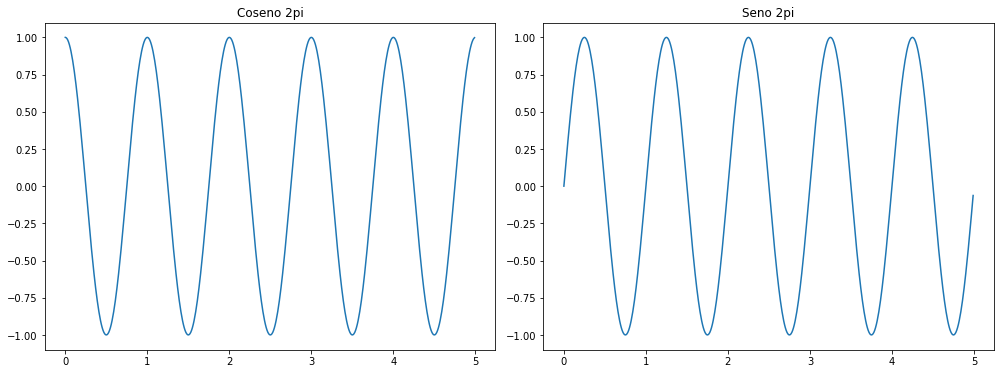

In [ ]:
plt.subplot(2,2,1) # utilizziamo un subplot di 1 riga e due colonne e utilizziamo lo spazio 1
plt.title("Coseno")
plt.plot(x, cos_x)

plt.subplot(2,2,2) # utilizziamo lo stesso subplot di 1 riga e due colonne ma ora utilizziamo lo spazio 2
plt.title("Seno")
plt.plot(x, sin_x)

plt.tight_layout()
plt.show()

Ovviamente possiamo fare tutto anche dentro un ciclo

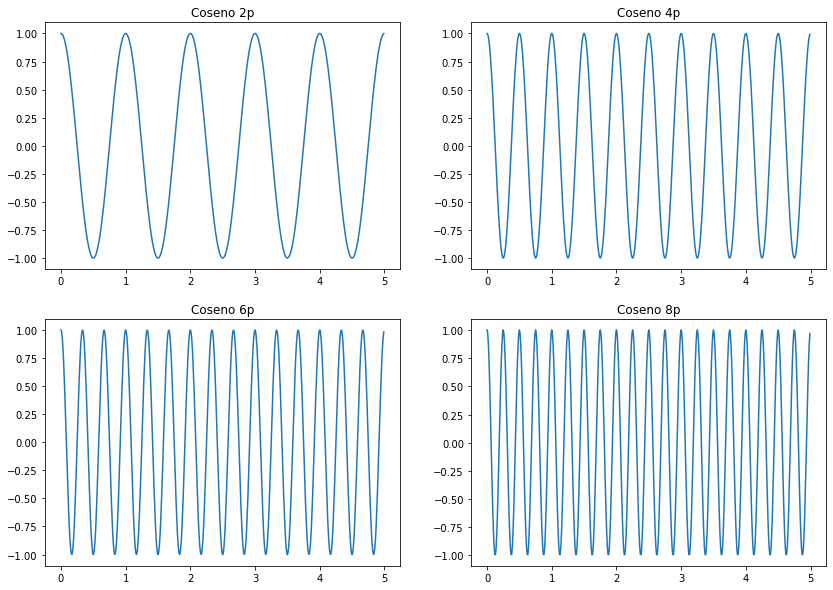

In [ ]:
for i in range(4):
  p = (i+1)*2
  cos_x = np.cos(p*np.pi*x)
  plt.subplot(2, 2, i+1)
  plt.title("Coseno %dp" % p)
  plt.plot(x, cos_x)

 ## Immagini

Matplotlib da anche la possibilità di visualizzare immagini tramite la funzione <span style="font-family: Monaco">imshow</span>.<br><br>
Per lavorare con le immagini dobbiamo utilizzare il modulo <span style="font-family: Monaco">image</span>, importiamolo con l'alias <span style="font-family: Monaco">mpimg</span>.

In [ ]:
import matplotlib.image as mpimg

Utilizzando la funzione <span style="font-family: Monaco">imread</span> possiamo caricare un'immagine dal nostro hard disk all'interno di un'array Numpy.

In [ ]:
img=mpimg.imread('res/chicca.jpg')
type(img)

numpy.ndarray

L'array Numpy è, ovviamente, composto da numeri. Osserviamo dimensione e range di valori di questo array.

In [ ]:
print("Dimensione dell'array: "+str(img.shape))
print("Valore minimo: %d" % img.min())
print("Valore massimo: %d" % img.max())

Dimensione dell'array: (800, 800, 3)
Valore minimo: 0
Valore massimo: 255


Il range di valori nell'array è 0-255, che corrisponde all'intensità di un singolo pixel:
* 0 = intensità minima (per immagini in bianco e nero equivale al nero)
* 255 = intensità massima (per immagini in bianco e nero equivale al bianco)

La dimensione dell'array è 800x800x3, questo vuol dire che è costituito da 3 matrici di dimensione 800x800, ogni matrice corrisponde a un canale dell'immagine: Rosso, Verde e Bianco.<br><br>
Adesso che abbiamo compreso come l'immagine è codificata nell'array, visualizziamola utilizzando la funzione <span style="font-family: Monaco">imshow</span>

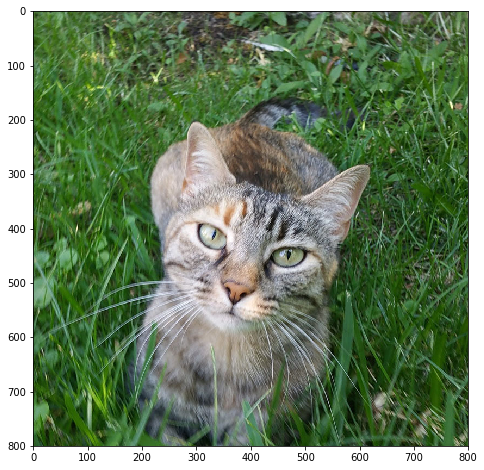

In [ ]:
plt.imshow(img)

Nel caso di immagini a singolo canale, possiamo utilizzare il parametro <span style="font-family: Monaco">cmap</span> per impostare la mappa di colori, dato che nel caso di immagini i valori sulle assi non sono così utili, possiamo nasconderli passando una lista vuota alle funzioni <span style="font-family: Monaco">xticks</span> e <span style="font-family: Monaco">yticks</span>

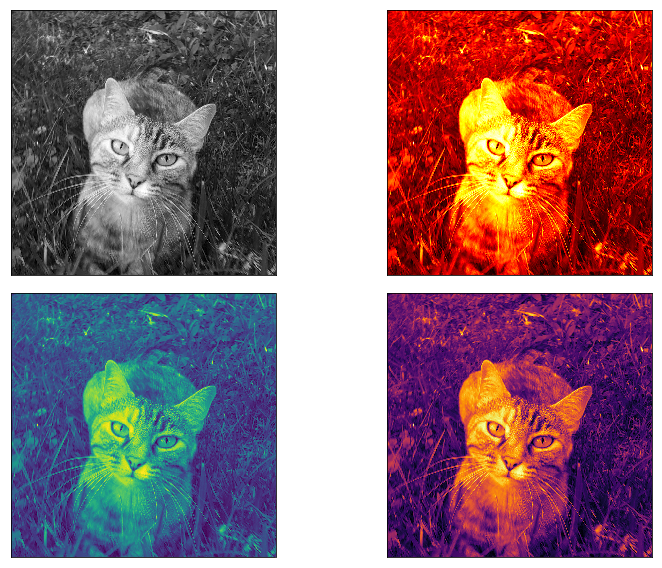

In [ ]:
sg_img= img[:,:,0] # estraiamo un singolo canale dall'immagine

cmaps = ["gray", "hot", "viridis", "inferno"] # definiamo una lista di mappe di colori di matplotlib

"""
Utilizziamo un ciclo for
per creare un subplot con l'immagine
per ogni cmap nella lista
"""

for i,cmap in enumerate(cmaps): 
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sg_img, cmap=cmap)

plt.tight_layout() #questa funziona aggiusta automaticamente i parametri dei subplot per una migliore resa
plt.show()

La funzione <span style="font-family: Monaco">imshow</span> accetta array i cui valori (i pixel) sono inclusi in uno di questi due range:
 * Numeri interi tra 0 e 255
 * Float compresi tra 0.0 e 1.0 
 
 Proviamo a normalizzare l'immagine riducendola in un range di float tra 0.0 e 1

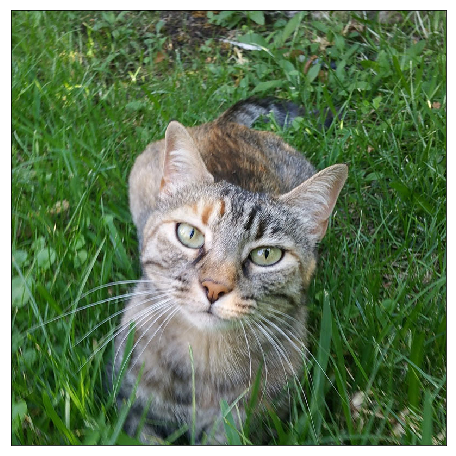

In [ ]:
norm_img= img/255.
plt.xticks([])
plt.yticks([])
plt.imshow(norm_img)

Stesso risultato !
<br><r>
Dato che la funzione <span style="font-family: Monaco">imshow</span> prende in input un array Numpy, perché non 
proviamo a generarne casualmente uno noi per vedere che immagine viene fuori ?<br>

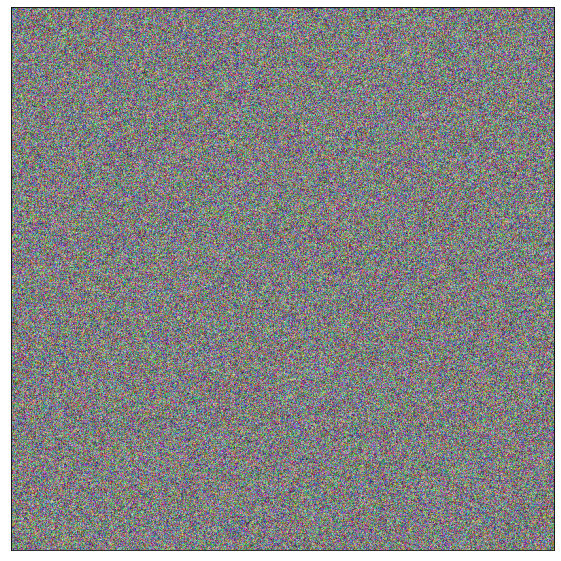

In [ ]:
random_img = np.random.rand(800,800,3) # array contenente numeri casuali tra 0.0 e 1.0
plt.xticks([])
plt.yticks([])
plt.imshow(random_img)

Un'opera d'arte :D !

## Stili
Come hai avuto modo di vedere i grafici di Matplotlib non sono il massimo dell'eleganza, fortunatamente c'è la possibilità di utilizzare stili diversi.<br>
Tramite la lista <span style="font-family: Monaco">plt.style.available</span> possiamo vedere quali sono gli stili disponibili.

In [ ]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

Basta scergliene uno tra quelli disponibili e applicarlo con la funzione <span style="font-family: Monaco">plt.style.use</span>

In [ ]:
plt.style.use('ggplot')

Adesso creiamo un grafico per vedere il nuovo stile.

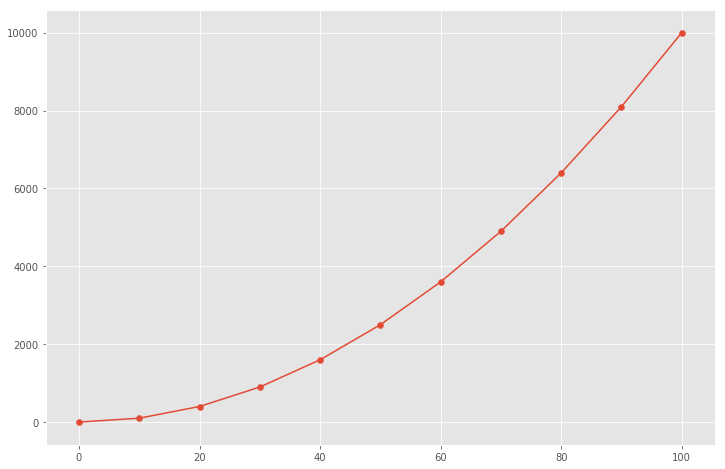

In [ ]:
x = np.linspace(0,100,num=11)
y = np.power(x,2)

plt.plot(x,y)
plt.scatter(x,y)
#plt.plot(x,y,'o') #avremmo potuto creare lo scatter plot anche in questo modo

plt.show()

Meglio vero ? Forse no.